In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [334]:
pd.set_option('display.max_colwidth', None)
data = pd.read_csv('Loan_default.csv')
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [335]:
data.drop(['LoanID'], axis=1, inplace=True)

In [336]:
data['HasMortgage'] = data['HasMortgage'].map({'Yes': 1, 'No': 0})
data['HasDependents'] = data['HasDependents'].map({'Yes': 1, 'No': 0})
data['HasCoSigner'] = data['HasCoSigner'].map({'Yes': 1, 'No': 0})

In [337]:
data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,0,0,Other,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,0,0,Home,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,1,1,Auto,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,1,1,Other,0,0


In [338]:
#data['MaritalStatus'] = data['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
#data['Education'] = data['Education'].map({'High School': 0, 'Bachelor\'s': 1, 'Master\'s': 2, 'PhD': 3})
#data['EmploymentType'] = data['EmploymentType'].map({'Unemployed': 0, 'Part-time': 1, 'Full-time': 2, 'Self-employed': 3})
#data['LoanPurpose'] = data['LoanPurpose'].map({'Auto': 0, 'Business': 1, 'Education': 2, 'Home': 3, 'Other':4})
data = pd.concat([data.drop('Education', axis=1), pd.get_dummies(data['Education'])], axis=1)
data = pd.concat([data.drop('EmploymentType', axis=1), pd.get_dummies(data['EmploymentType'])], axis=1)
data = pd.concat([data.drop('MaritalStatus', axis=1), pd.get_dummies(data['MaritalStatus'])], axis=1)
data = pd.concat([data.drop('LoanPurpose', axis=1), pd.get_dummies(data['LoanPurpose'])], axis=1)


In [339]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)
scaled_data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,Self-employed,Unemployed,Divorced,Married,Single,Auto,Business,Education,Home,Other
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0.999973,...,-0.576562,-0.577273,1.415244,-0.708268,-0.706461,-0.498620,-0.501398,-0.499606,-0.501325,2.003812
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,-1.000027,...,-0.576562,-0.577273,-0.706592,1.411895,-0.706461,-0.498620,-0.501398,-0.499606,-0.501325,2.003812
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,0.999973,...,-0.576562,1.732281,1.415244,-0.708268,-0.706461,2.005534,-0.501398,-0.499606,-0.501325,-0.499049
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,-1.000027,...,-0.576562,-0.577273,-0.706592,1.411895,-0.706461,-0.498620,1.994422,-0.499606,-0.501325,-0.499049
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,-1.000027,...,-0.576562,1.732281,1.415244,-0.708268,-0.706461,2.005534,-0.501398,-0.499606,-0.501325,-0.499049


In [441]:
def apply_pca(X, n_components=None):
    # Create principal components
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)

    # Create loadings
    loadings = pd.DataFrame(pca.components_.T, columns=component_names, index=X.columns)

    return pca, X_pca, loadings

In [442]:
def plot_pca_variance(pca, width=20, dpi=120):
    
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(xlabel="Component", title="% Explained Variance", ylim=(0.0, round(10*max(evr)+0.5)/10))
    axs[0].title.set_weight('bold')
    axs[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    axs[0].set_xticks(grid)
    axs[0].set_xticklabels(grid)

    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(grid, cv, "o-")
    axs[1].set(xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.01))
    axs[1].title.set_weight('bold')
    axs[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    axs[1].set_xticks(grid)
    axs[1].set_xticklabels(grid)

    # Cumulative variance value on the 2nd plot
    axs[1].annotate(f'CV={cv[-1]:.3f}', (grid[-1], cv[-1]), textcoords="offset points", xytext=(-15,-10), ha='center')

    # Set up figure
    fig.set(figwidth=width, dpi=dpi)

In [443]:
from sklearn.feature_selection import mutual_info_regression , mutual_info_classif


def plot_mi_scores(X, y, mode="regression", p: int = None):

    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    if mode == 'regression':
        scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    else:
        scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    scores = pd.Series(scores, name="MI Scores", index=X.columns)
    scores = scores.sort_values(ascending=True)
    
    if p is not None:
        scores = scores[-p:]

    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.ylabel("Independent Features")
    plt.title("Mutual Information Scores", fontsize=30)
    plt.show(block=True)


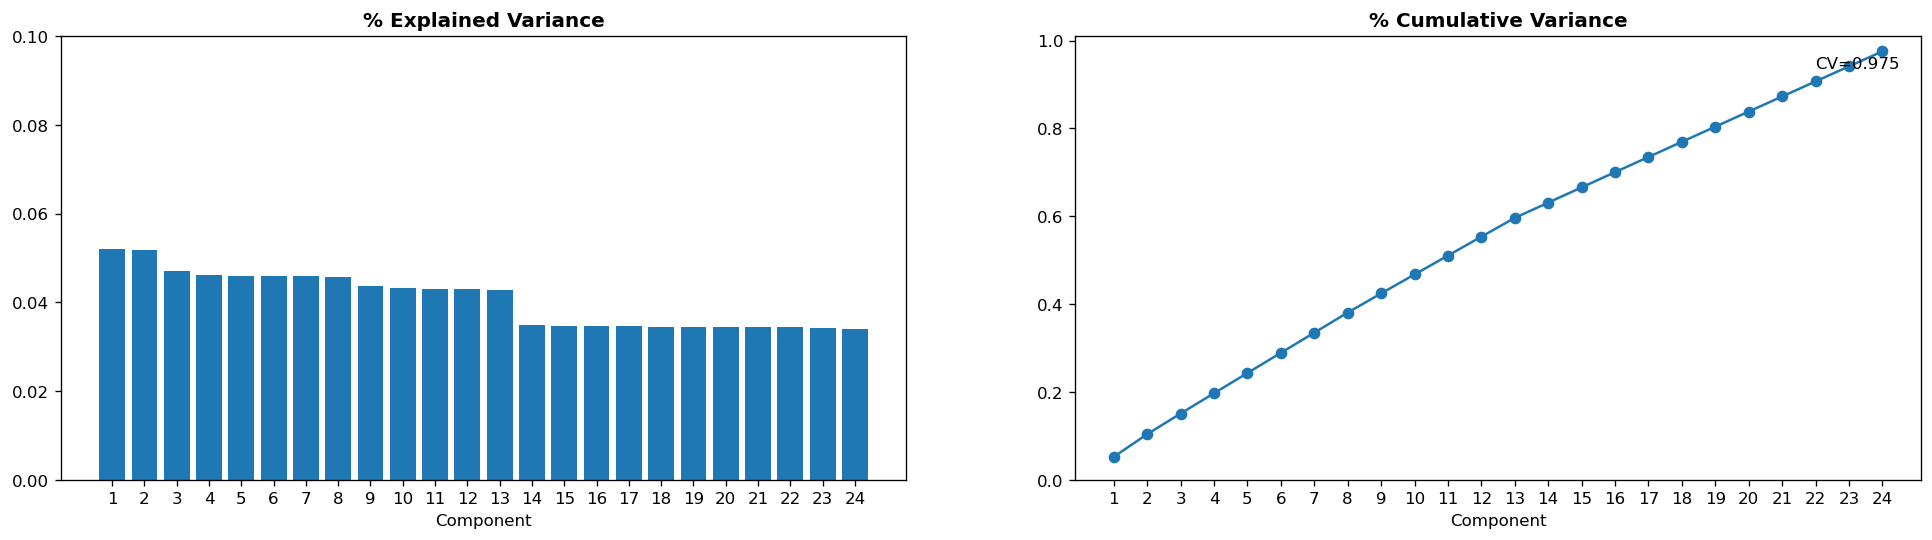

In [444]:
pca_24, x_pca_24, loadings_24 = apply_pca(scaled_data, n_components=24)
#and plot pca variance graph
plot_pca_variance(pca_24)

In [445]:
list_of_pcs = []
for i in range(1,25):
    list_of_pcs.append(f'PC_{i}')
    
dataset_pca = pd.DataFrame(abs(pca_24.components_), columns=scaled_data.columns, index=list_of_pcs)

In [446]:
print("\n*************** Most important features *************************")
for i in range(len(dataset_pca)):
    print(f'As per PC_{i+1}:\n{(dataset_pca[dataset_pca > 0.3].iloc[i]).dropna()}')
    print('\n\n')


*************** Most important features *************************
As per PC_1:
Divorced    0.566353
Married     0.782269
Name: PC_1, dtype: float64



As per PC_2:
Divorced    0.580979
Single      0.785958
Name: PC_2, dtype: float64



As per PC_3:
Default       0.365722
Master's      0.304739
Full-time     0.545958
Unemployed    0.488485
Name: PC_3, dtype: float64



As per PC_4:
Bachelor's     0.525564
High School    0.483517
Part-time      0.570150
Name: PC_4, dtype: float64



As per PC_5:
Bachelor's       0.362115
PhD              0.685245
Full-time        0.441288
Self-employed    0.318770
Name: PC_5, dtype: float64



As per PC_6:
High School      0.310867
PhD              0.344607
Part-time        0.313994
Self-employed    0.531215
Unemployed       0.566725
Name: PC_6, dtype: float64



As per PC_7:
High School      0.501491
Master's         0.499252
Part-time        0.323383
Self-employed    0.354163
Name: PC_7, dtype: float64



As per PC_8:
Bachelor's       0.444348
Master'

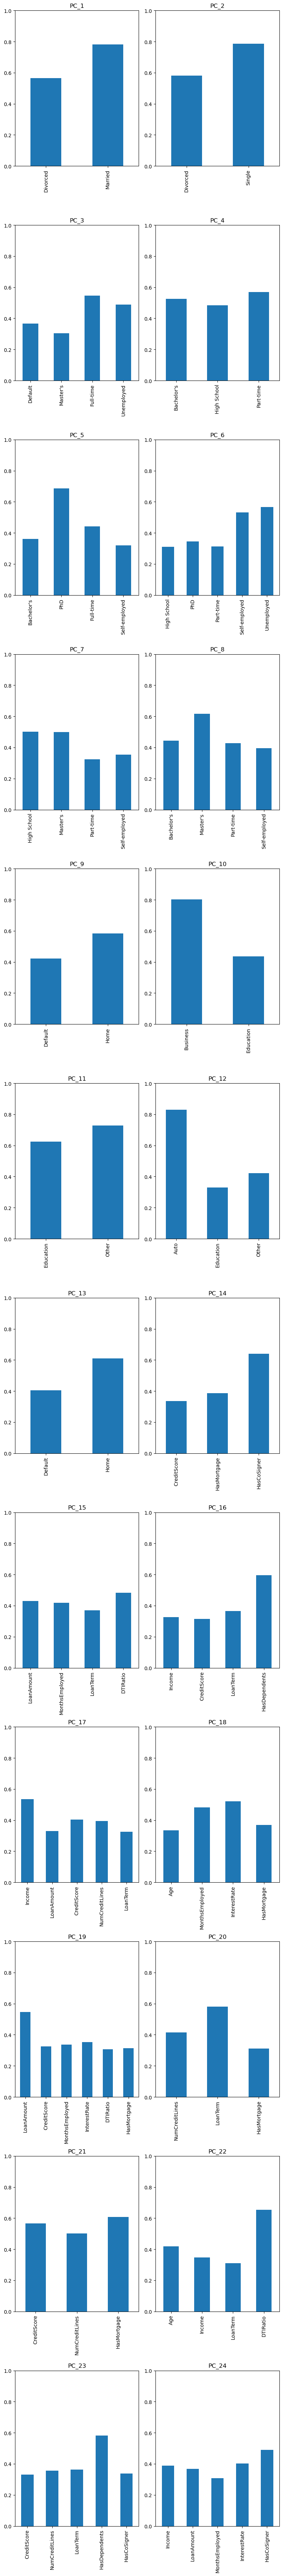

In [447]:
import matplotlib.pyplot as plt

# Replace 'dataset_pca' with your actual DataFrame
# dataset_pca = ...

fig, axs = plt.subplots(12, 2, figsize=(8, 72))  # 12 rows and 2 columns

for i in range(len(dataset_pca)):
    pc_series = dataset_pca.iloc[i]
    filtered_series = pc_series[pc_series > 0.3].dropna()

    # Determining the subplot position
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Plotting the data
    filtered_series.plot(kind='bar', ax=ax)
    ax.set_title(f'PC_{i+1}')
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()


In [8]:
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
import sklearn.metrics as metrics
from sklearn.cluster import KMeans

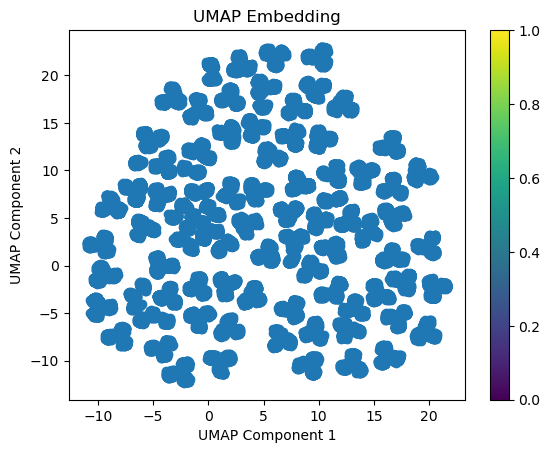

In [85]:
pca_24 = PCA(n_components=24)
pca_24_result = pca_16.fit_transform(scaled_data)

import umap.umap_ as umap
umap_model = umap.UMAP(n_components=2, n_neighbors=100, min_dist=0.5)
umap_embedding = umap_model.fit_transform(pca_24_result)

plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1])
plt.title('UMAP Embedding')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar()
plt.show()

In [61]:
import matplotlib.colors as mcolors

def make_legend_handle(labels, colors):
    unique_labels, counts = np.unique(labels, return_counts=True)
    label_counts = dict(zip(unique_labels, counts))
    
    legend_labels = [f"Cluster {label+1} - {label_counts[label]}" for i, label in enumerate(unique_labels)]
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i], markersize=10, markerfacecolor=colors[i]) for i in range(len(unique_labels))]

    return handles

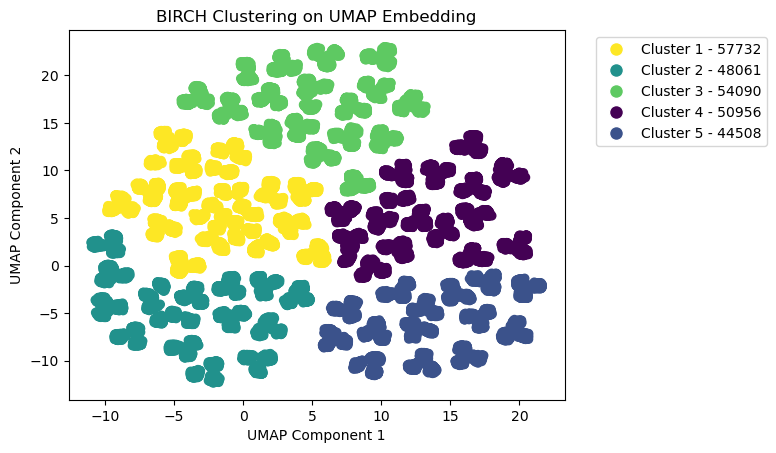

In [249]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import Birch, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
import umap
import pandas as pd

# Birch clustering
birch = Birch(n_clusters=5, threshold=0.5, branching_factor=200)
birch_labels = birch.fit_predict(umap_embedding)

colors = ['#fde725','#21918c','#5ec962','#440154','#3b528b']
birch_unique_labels = np.unique(birch_labels)

color_dict = dict(zip(birch_unique_labels, colors))
cluster_colors = [color_dict[label] for label in birch_labels]


plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=cluster_colors)
plt.title('BIRCH Clustering on UMAP Embedding')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
birch_handles = make_legend_handle(birch_labels, colors)
plt.legend(handles=birch_handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [250]:
def gini_coefficient(cluster_sizes):
    sorted_sizes = sorted(cluster_sizes)
    n = len(sorted_sizes)
    cumulative_sum = 0
    for i, size in enumerate(sorted_sizes, 1):
        cumulative_sum += size * (2 * i - (n + 1))
    total_sum = sum(sorted_sizes)
    
    # Zabezpečenie, aby sme nedelili nulou
    if total_sum == 0:
        return None
    
    # Výpočet Giniho koeficientu
    return cumulative_sum / (n * total_sum)

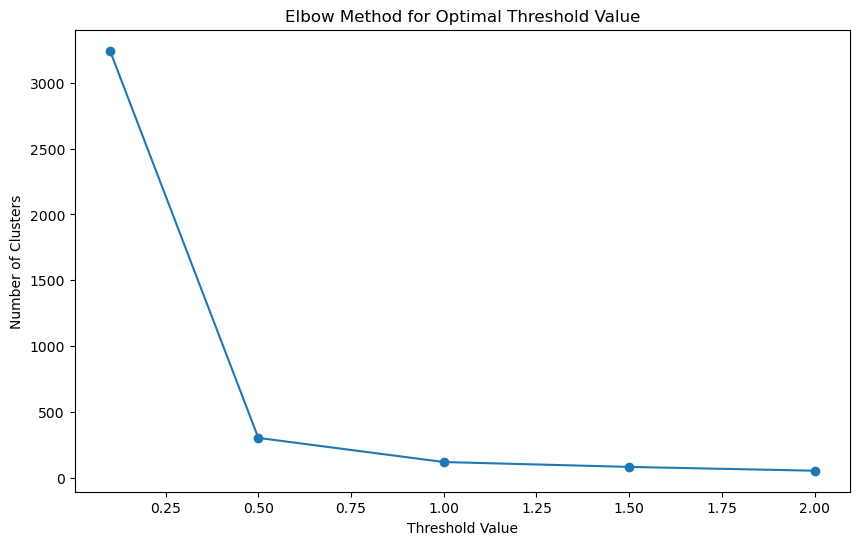

In [246]:
threshold_values = [0.1, 0.5, 1.0, 1.5, 2.0]  # Example threshold values
n_clusters = []

for threshold in threshold_values:
    birch = Birch(threshold=threshold, n_clusters=None)
    birch.fit(umap_embedding)
    n_clusters.append(len(np.unique(birch.labels_)))

plt.figure(figsize=(10, 6))
plt.plot(threshold_values, n_clusters, marker='o')
plt.xlabel('Threshold Value')
plt.ylabel('Number of Clusters')
plt.title('Elbow Method for Optimal Threshold Value')
plt.show()


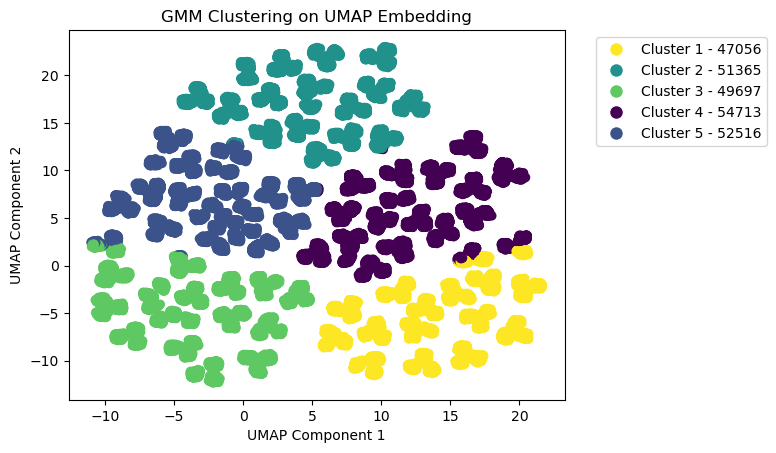

In [268]:
# GMM clustering
gmm = GaussianMixture(n_components=5)
gmm_labels = gmm.fit_predict(umap_embedding)

colors = ['#fde725','#21918c','#5ec962','#440154','#3b528b']
gmm_unique_labels = np.unique(birch_labels)

color_dict = dict(zip(gmm_unique_labels, colors))
cluster_colors = [color_dict[label] for label in gmm_labels]


plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=cluster_colors)
plt.title('GMM Clustering on UMAP Embedding')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
gmm_handles = make_legend_handle(gmm_labels, colors)
plt.legend(handles=gmm_handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

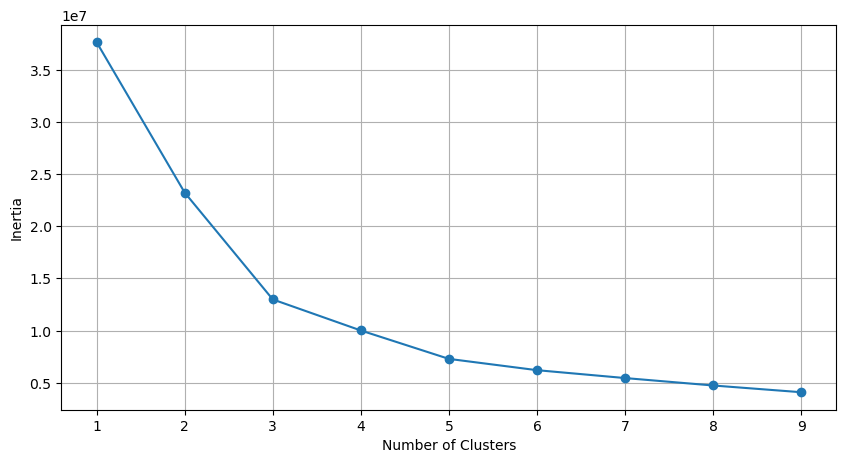

In [105]:
means = []
inertias = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(umap_embedding)
    
    means.append(k)
    u = kmeans.inertia_
    inertias.append(u)
    
fig = plt.subplots(figsize=(10,5))
plt.plot(means,inertias, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

C:\Users\opscu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


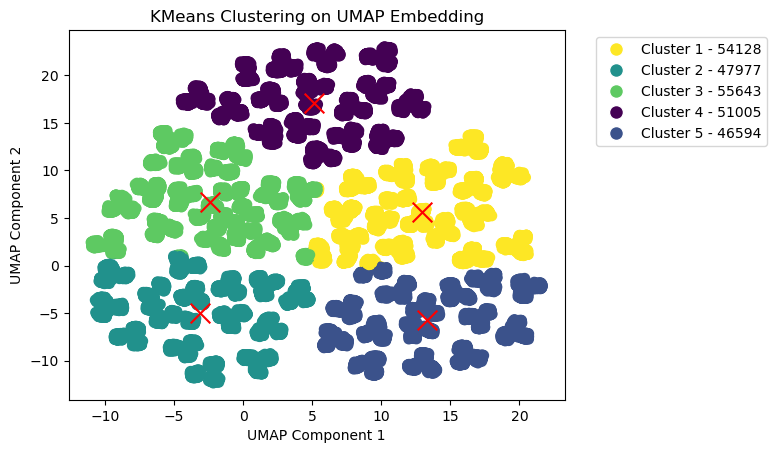

In [94]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(umap_embedding)

cluster_centers = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_

colors = ['#fde725','#21918c','#5ec962','#440154','#3b528b']
kmeans_unique_labels = np.unique(birch_labels)

color_dict = dict(zip(kmeans_unique_labels, colors))
cluster_colors = [color_dict[label] for label in kmeans_labels]

plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=cluster_colors, s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('KMeans Clustering on UMAP Embedding')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
kmeans_handles = make_legend_handle(kmeans_labels, colors)
plt.legend(handles=kmeans_handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

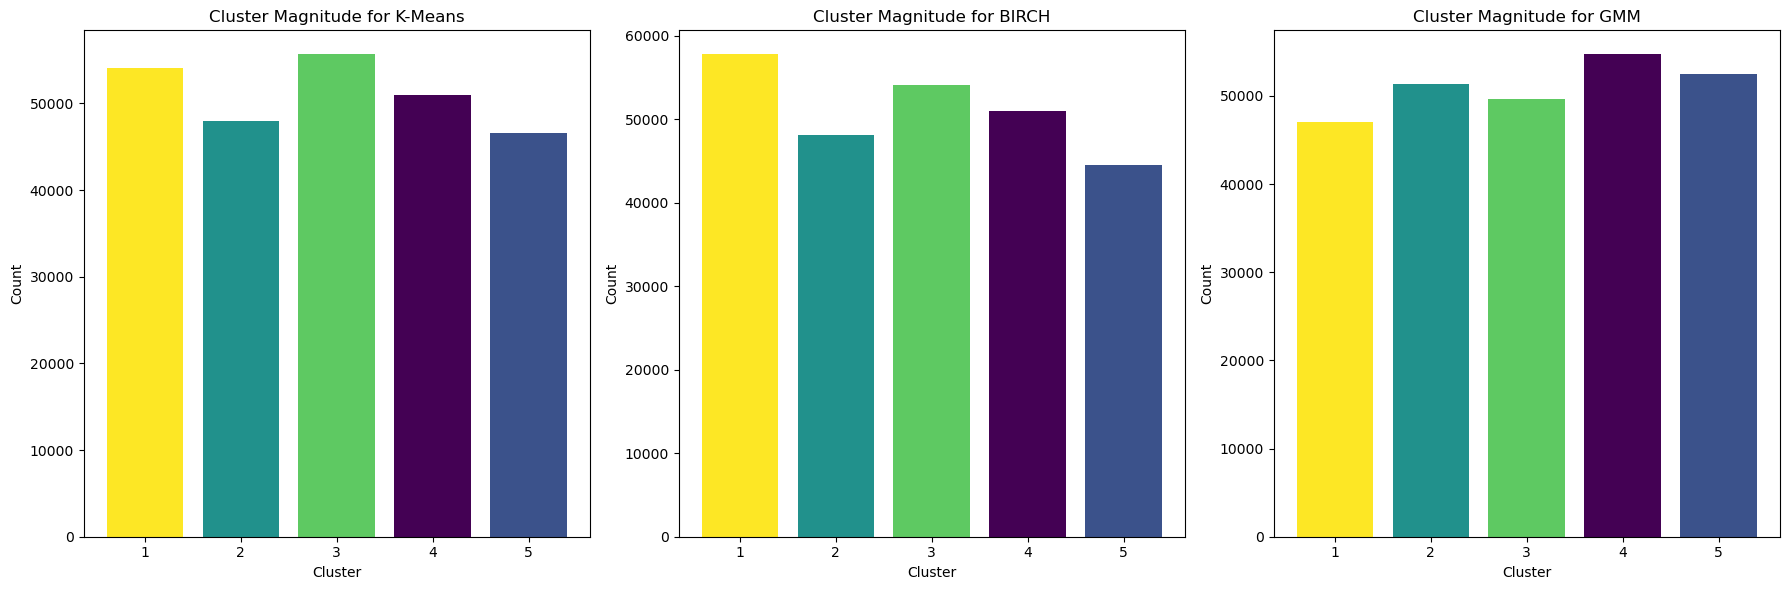

In [299]:
hans = [kmeans_handles,birch_handles,gmm_handles]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, ax in enumerate(axes.flat):
    cols = []
    labs = []
    cls = []
    for handle in hans[i]:
        color = handle.get_markerfacecolor()  # Získanie farby
        label = handle.get_label()  # Získanie popisku
        cols.append(color)
        labs.append(int(label[-5:]))
        cls.append(label[8])
   
    
    ax.bar(cls, labs, color=cols)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    if i == 0:
        ax.set_title('Cluster Magnitude for K-Means')
    elif i == 1:
        ax.set_title('Cluster Magnitude for BIRCH')
    else:
        ax.set_title('Cluster Magnitude for GMM')
    ax.set_xticks(cls)
    
plt.tight_layout()
plt.show()

In [271]:
cluster_sizes = np.unique(birch_labels, return_counts=True)
gini = gini_coefficient(cluster_sizes[1])
print(f"Gini Index: {gini:.3f}")

Gini Index: 0.051


In [269]:
cluster_sizes = np.unique(gmm_labels, return_counts=True)
gini = gini_coefficient(cluster_sizes[1])
print(f"Gini Index: {gini:.3f}")

Gini Index: 0.028


In [270]:
cluster_sizes = np.unique(kmeans_labels, return_counts=True)
gini = gini_coefficient(cluster_sizes[1])
print(f"Gini Index: {gini:.3f}")

Gini Index: 0.038


In [132]:
pip install memory_profiler

Note: you may need to restart the kernel to use updated packages.


In [235]:
import psutil
import os
import time
from memory_profiler import memory_usage
import tracemalloc

def monitor_resources(func, *args, **kwargs):
    start_time = time.time()
    mem_before = memory_usage(-1, interval=0.2, timeout=1)
    cpu_before = psutil.cpu_percent(interval=None)

    result = func(*args, **kwargs)  # Run the clustering algorithm

    cpu_after = psutil.cpu_percent(interval=None)
    mem_after = memory_usage(-1, interval=0.2, timeout=1)
    
    elapsed_time = time.time() - start_time
     
    cpu_usage = cpu_after - cpu_before
    mem_usage = max(mem_after) - min(mem_before)
    

    # Return all three metrics as a list
    return [cpu_usage, mem_usage, elapsed_time]


In [260]:
cpu_kmeans = []
cpu_birch = []
cpu_gmm = []
ram_kmeans = []
ram_birch = []
ram_gmm = []
time_kmeans = []
time_birch = []
time_gmm = []

for i in range(0,100):
    # Example for BIRCH
    birch = Birch(n_clusters=5, threshold=0.5, branching_factor=200)
    b = monitor_resources(birch.fit_predict, umap_embedding)
    cpu_birch.append(b[0])
    ram_birch.append(b[1])
    time_birch.append(b[2])
    # Example of monitoring K-Means
    kmeans = KMeans(n_clusters=5)
    k = monitor_resources(kmeans.fit, umap_embedding)
    cpu_kmeans.append(k[0])
    ram_kmeans.append(k[1])
    time_kmeans.append(k[2])
    # Example for GMM
    gmm = GaussianMixture(n_components=5, covariance_type='diag')
    g = monitor_resources(gmm.fit_predict, umap_embedding)
    cpu_gmm.append(g[0])
    ram_gmm.append(g[1])
    time_gmm.append(g[2])
    print(f"{i+1}/100")


1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100
100/100


In [261]:
def average(lst):
    return (sum(lst)/len(lst))

print(f"Average CPU usage for BIRCH: {average(cpu_birch):.2f}%")
print(f"Average Memory usage for BIRCH: {average(ram_birch):.2f} MB")
print(f"Average Time elapsed for BIRCH: {average(time_birch):.2f} seconds")

Average CPU usage for BIRCH: 8.07%
Average Memory usage for BIRCH: 2.36 MB
Average Time elapsed for BIRCH: 9.37 seconds


In [262]:
print(f"Average CPU usage for K-Means: {average(cpu_kmeans):.2f}%")
print(f"Average Memory usage for K-Means: {average(ram_kmeans):.2f} MB")
print(f"Average Time elapsed for K-Means: {average(time_kmeans):.2f} seconds")

Average CPU usage for K-Means: 8.40%
Average Memory usage for K-Means: 0.08 MB
Average Time elapsed for K-Means: 3.68 seconds


In [263]:
print(f"Average CPU usage for GMM: {average(cpu_gmm):.2f}%")
print(f"Average Memory usage for GMM: {average(ram_gmm):.2f} MB")
print(f"Average Time elapsed for GMM: {average(time_gmm):.2f} seconds")

Average CPU usage for GMM: 8.75%
Average Memory usage for GMM: 1.96 MB
Average Time elapsed for GMM: 2.71 seconds


In [315]:
vyp_data = {'Algoritmus':["K-Means", "BIRCH", "GMM"],
            'CPU Usage (%)': [average(cpu_kmeans), average(cpu_birch), average(cpu_gmm)],
            'Memory Usage (%)': [average(ram_kmeans), average(ram_birch), average(ram_gmm)],
            'Elapsed Time (s)': [average(time_kmeans), average(time_birch), average(time_gmm)]}

vypoctova_narocnost = pd.DataFrame(vyp_data)
vypoctova_narocnost['CPU Usage (%)'] = vypoctova_narocnost['CPU Usage (%)'].round(2)
vypoctova_narocnost['Memory Usage (%)'] = vypoctova_narocnost['Memory Usage (%)'].round(2)
vypoctova_narocnost['Elapsed Time (s)'] = vypoctova_narocnost['Elapsed Time (s)'].round(2)
vypoctova_narocnost = vypoctova_narocnost.set_index('Algoritmus')
vypoctova_narocnost

,CPU Usage (%),Memory Usage (%),Elapsed Time (s)
Algoritmus,,,
K-Means,8.40,0.08,3.68
BIRCH,8.07,2.36,9.37
GMM,8.75,1.96,2.71


In [78]:
from sklearn.metrics import silhouette_samples, silhouette_score
import time

start_time = time.time()
kmeans = KMeans(n_clusters=5, random_state=0).fit(umap_embedding)
end_time = time.time()
duration = end_time - start_time

silhouette_avg = silhouette_score(umap_embedding, kmeans.labels_)

print(f"Čas trvania segmentácie: {duration} sekúnd")
print(f"Silhouette skóre: {silhouette_avg}")

C:\Users\opscu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Čas trvania segmentácie: 2.0220141410827637 sekúnd
Silhouette skóre: 0.43524783849716187


In [81]:
silhouette_avg_birch = silhouette_score(umap_embedding, birch.fit_predict(umap_embedding))

print(f"BIRCH - Silhouette skóre: {silhouette_avg_birch}")

BIRCH - Silhouette skóre: 0.4166829288005829


In [275]:
silhouette_avg_gmm = silhouette_score(umap_embedding, gmm_labels)

print(f"GMM - Silhouette skóre: {silhouette_avg_gmm}")

GMM - Silhouette skóre: 0.4081047475337982


In [435]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(umap_embedding, kmeans_labels)
print("Davies-Bouldin Index pre K-Means:", db_index)

Davies-Bouldin Index pre K-Means: 0.8423668869608487


In [436]:
db_index = davies_bouldin_score(umap_embedding, birch_labels)
print("Davies-Bouldin Index pre BIRCH:", db_index)

Davies-Bouldin Index pre BIRCH: 0.8697690514379094


In [437]:
db_index = davies_bouldin_score(umap_embedding, gmm_labels)
print("Davies-Bouldin Index pre GMM:", db_index)

Davies-Bouldin Index pre GMM: 0.8502432025101658


In [438]:
from sklearn.metrics import calinski_harabasz_score
ch_index = calinski_harabasz_score(umap_embedding, kmeans_labels)
print("Calinski-Harabasz Index pre K-Means:", ch_index)

Calinski-Harabasz Index pre K-Means: 265655.0713579329


In [439]:
ch_index = calinski_harabasz_score(umap_embedding, birch_labels)
print("Calinski-Harabasz Index pre BIRCH:", ch_index)

Calinski-Harabasz Index pre BIRCH: 252747.2952658936


In [440]:
ch_index = calinski_harabasz_score(umap_embedding, gmm_labels)
print("Calinski-Harabasz Index pre GMM:", ch_index)

Calinski-Harabasz Index pre GMM: 262447.00841225474
